<a href="https://colab.research.google.com/github/max3700/A1_task2_regression_ROC/blob/master/A1_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestCentroid

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Task_1_2.xlsx to Task_1_2.xlsx


In [ ]:
df = pd.read_excel('Task_1_2.xlsx', sheet_name=1)
df.dtypes

In [ ]:
df = df.fillna(df.mean())

In [ ]:
cols = list(df.columns)
a, b = cols.index('Target'), cols.index('ID')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]

In [ ]:
df

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,283,1,0.0,24.972718,14.497498,10,0,1.02273,1.01608,1.552680,1.15000,30.00000,123.00000,45.54444,3.80000,7.32222,38.22222,3.833330,819.35667,0.00000,1.66667,0.0000,0.28560,831.68333,783.81667,171.33333,818.150000,0.62772,0.13333,0.00000,6.418930,0.97122,6.41893
1,342,0,0.0,30.000000,6.801530,0,0,1.00000,1.65348,1.148520,0.40556,9.00000,78.00000,23.74444,17.97222,0.00000,23.74444,3.833330,316.61667,0.00000,0.33333,0.0000,0.00000,195.13889,168.30000,81.00000,268.877144,6.32407,0.26667,0.33333,9.048853,1.60714,3.44800
2,631,0,0.0,30.000000,9.602670,0,0,1.00000,0.84143,0.875107,0.00000,28.66667,12.66667,15.80000,22.57222,4.58333,11.21667,3.833330,184.49333,0.00000,0.00000,0.0000,-2.28400,226.10556,207.41667,110.00000,184.494440,2.25635,0.00000,0.06667,9.048853,0.75000,8.08000
3,1165,0,0.0,30.333330,15.325530,0,0,0.98901,0.88114,0.875107,2.68333,61.66667,112.33333,121.02222,175.54444,10.20556,110.81667,3.833330,625.32333,0.00000,2.00000,-2.6938,-2.73230,567.53889,441.52778,194.00000,625.322220,2.74469,0.13333,0.40000,13.504000,0.98119,13.50400
4,1469,0,0.0,28.000000,7.541330,0,0,0.92857,1.21447,0.601380,0.00000,26.00000,89.00000,66.92222,7.52778,0.00000,66.92222,3.833330,53.45000,0.00000,0.00000,0.0000,2.42605,154.80556,86.64444,71.66667,53.450000,0.91130,0.46667,0.40000,9.048853,0.40171,3.44800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12590517,0,0.0,18.000000,4.737200,0,0,0.83333,0.94478,0.545320,0.00000,9.00000,10.33333,2.18333,4.20556,0.00000,2.18333,0.233330,27.53000,0.00000,0.00000,0.0000,0.00000,35.63889,33.57422,25.66667,27.527780,0.59411,0.26667,0.26667,3.080000,0.83333,3.08000
9996,12594579,0,0.0,8.000000,7.747100,29,0,0.50000,1.03436,0.297890,3.93333,9.00000,28.00000,8.20000,17.07778,1.69444,6.50556,0.233330,32.65667,0.00000,4.66667,0.0000,0.39930,72.47222,68.27194,20.33333,32.305560,1.47413,0.20000,0.33333,9.048853,1.11434,7.36710
9997,12844266,0,0.0,30.333330,14.497498,0,0,0.98901,1.12891,1.556490,13.00000,38.33333,193.33333,41.19444,44.72778,6.91111,34.28333,0.200000,227.01333,0.00000,22.66667,0.0000,3.61400,212.78889,183.60606,137.66667,225.655560,0.94152,0.20000,0.33333,16.600000,0.78899,16.60000
9998,12857302,0,0.0,28.666670,6.709500,0,0,1.01163,1.02243,0.863690,0.10000,13.33333,48.33333,0.59444,4.05556,0.03889,0.55556,0.200000,363.32667,0.00000,0.33333,-0.0355,0.22575,96.41667,100.09256,74.33333,363.327780,0.61164,0.00000,0.00000,6.560000,1.03121,6.56000


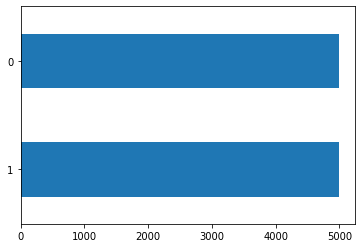

In [ ]:
df['Target'].value_counts().plot.barh();

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


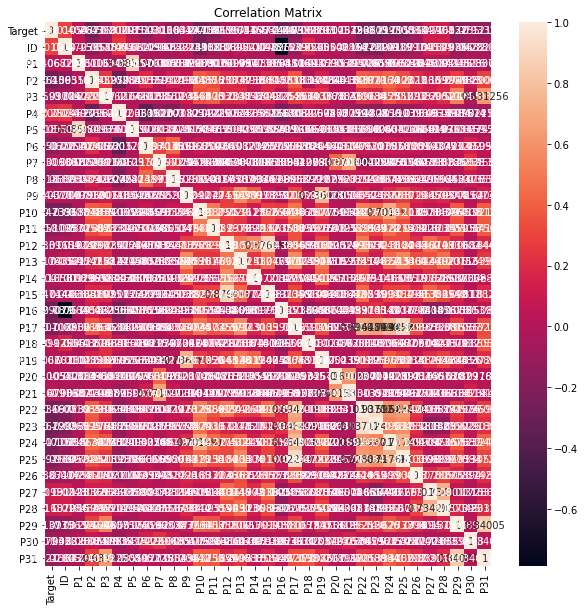

In [ ]:
import seaborn as sn
corrMatrix = df.corr()
plt.figure(figsize=(10, 10))
sn.heatmap(corrMatrix, annot=True, fmt='g', )
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

data_frame = df[["Target", "ID","P8", "P10", "P22", "P23", "P24", "P26"]]

# data_frame = df
trn = data_frame.values[:,1:]
trg = data_frame.values[:, 0]

# trn = preprocessing.scale(trn)

Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.55)
Ytrn = Ytrn.astype('int')

In [ ]:
model = RandomForestRegressor(n_estimators = 40)
model.fit(Xtrn, Ytrn)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
Xtest

In [ ]:
Ypred = model.predict(Xtest)
Ypred

array([0.275, 0.6  , 0.8  , ..., 0.475, 0.85 , 0.9  ])

In [ ]:
Ypred = Ypred.round()

In [ ]:
Ypred

array([0., 1., 1., ..., 0., 1., 1.])

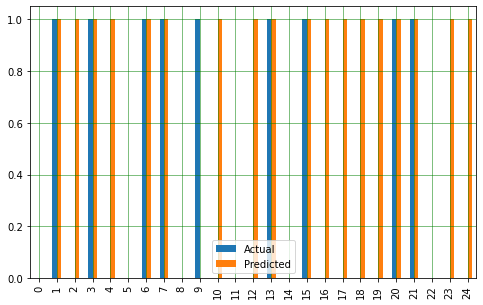

In [ ]:
dff = pd.DataFrame({'Actual': Ytest.flatten(), 'Predicted': Ypred.flatten()})
df1 = dff.head(25)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(Ytest, Ypred))
# We can understand R2_score as the similarity of data sets. The closer to 1 the better

Accuracy: 0.6643636363636364


In [ ]:
validate = pd.read_excel('Task_1_2.xlsx', sheet_name=2)

In [ ]:
validate = validate.fillna(validate.mean())

In [ ]:
corrMatrix = validate.corr()
plt.figure(figsize=(10, 10))
sn.heatmap(corrMatrix, annot=True, fmt='g', )
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data_frame_validate = validate[["ID", "P8", "P10", "P22", "P23", "P24", "P26"]]

# data_frame = df
trnv = data_frame_validate.values[:,0:]
trgv = data_frame_validate.values[:, 0]

# trn = preprocessing.scale(trn)

Xtrnv, Xvalidate, Ytrnv, Ytestv = train_test_split(trnv, trgv, test_size=0.99)
Ytrnv = Ytrn.astype('int')

In [ ]:
Xvalidate

array([[2.90204700e+06, 9.52800000e-01, 2.43333300e+01, ...,
        2.79972220e+02, 6.63333300e+01, 8.45005000e+00],
       [2.45091900e+06, 1.30553000e+00, 5.50000000e+01, ...,
        1.07516667e+03, 1.59000000e+02, 2.62770000e+00],
       [8.57540900e+06, 1.09605000e+00, 2.50000000e+01, ...,
        7.56738890e+02, 2.94000000e+02, 4.02639000e+00],
       ...,
       [2.99851600e+06, 1.21269000e+00, 3.30000000e+01, ...,
        2.83080390e+02, 1.38333330e+02, 6.43250000e-01],
       [3.00872500e+06, 1.33492000e+00, 2.26666700e+01, ...,
        1.27544000e+02, 1.33000000e+02, 2.58272000e+00],
       [2.53059900e+06, 1.03848000e+00, 9.00000000e+00, ...,
        1.82255560e+02, 1.30000000e+01, 3.94440000e-01]])

In [ ]:
Ypredv = model.predict(Xvalidate)
Ypredv

array([0.075, 0.25 , 0.55 , ..., 0.375, 0.55 , 0.25 ])

In [ ]:
Ypredv = Ypredv.round()

In [ ]:
Ypredv

array([0., 0., 1., ..., 0., 1., 0.])

In [ ]:
import seaborn as sns
from sklearn.metrics import precision_recall_curve, classification_report

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

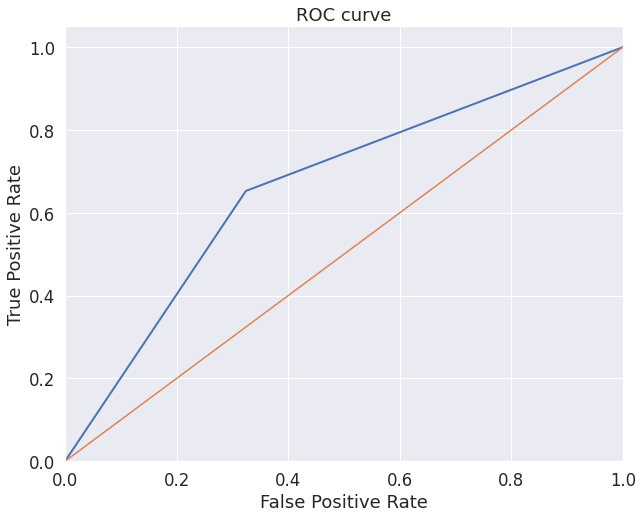

In [ ]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(Ytest, Ypred)
#roc_auc = auc(Ytest, Ypred)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()